<a href="https://colab.research.google.com/github/Sirius1002/Summer/blob/main/R_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of rows with missing values: 51


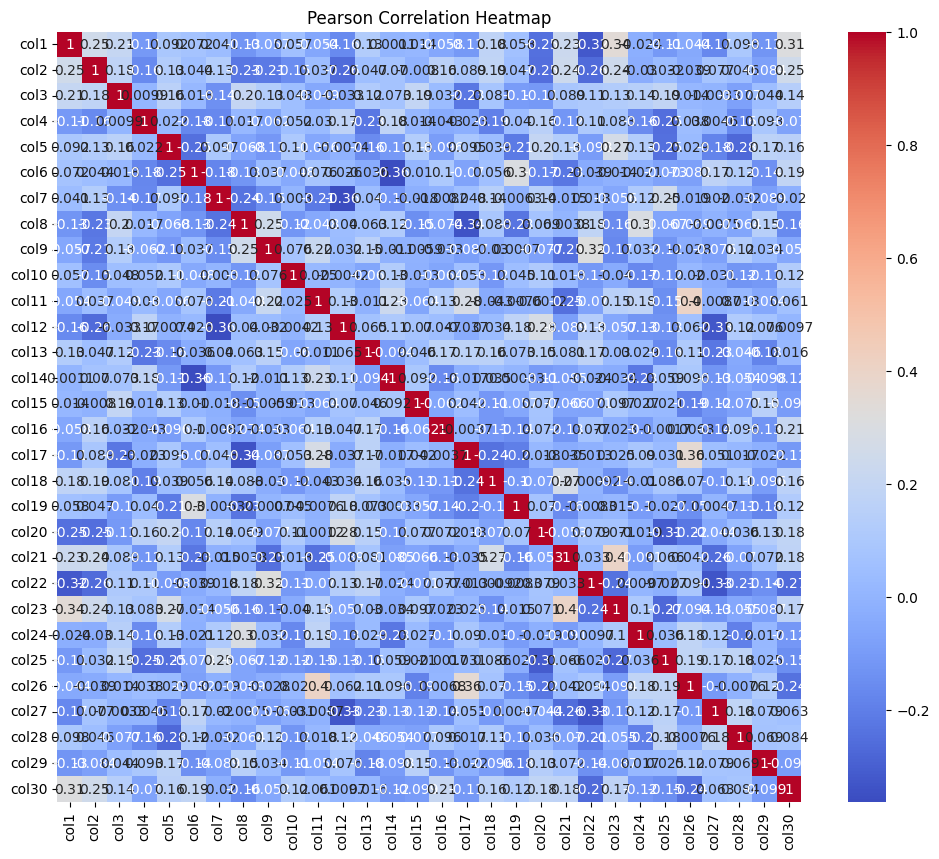

Columns with correlation <= 0.7: Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
       'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17',
       'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25',
       'col26', 'col27', 'col28', 'col29', 'col30'],
      dtype='object')


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a random dataset
np.random.seed(42)
dataset = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)), columns=[f"col{i+1}" for i in range(30)])

# (i) Replace values with NA between rows 10 and 60
dataset.iloc[10:61] = np.nan

# Count rows with missing values
rows_with_na = dataset.isna().any(axis=1).sum()
print("Number of rows with missing values:", rows_with_na)

# (ii) Replace NA values with the average of each column
dataset = dataset.fillna(dataset.mean())

# (iii) Calculate Pearson correlation and plot heat map
correlation = dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Select columns with correlation <= 0.7
selected_columns = correlation[correlation <= 0.7].dropna(axis=1, how="all").columns
print("Columns with correlation <= 0.7:", selected_columns)

# (iv) Normalize values between 0 and 10
normalized_dataset = (dataset - dataset.min()) / (dataset.max() - dataset.min()) * 10

# (v) Replace values <= 0.5 with 1, else with 0
dataset_binary = dataset.applymap(lambda x: 1 if x <= 0.5 else 0)


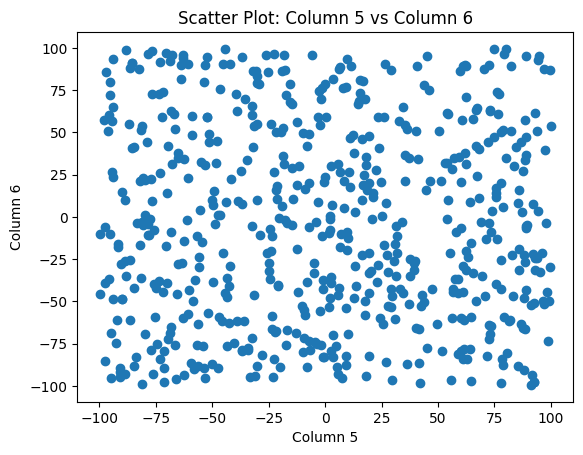

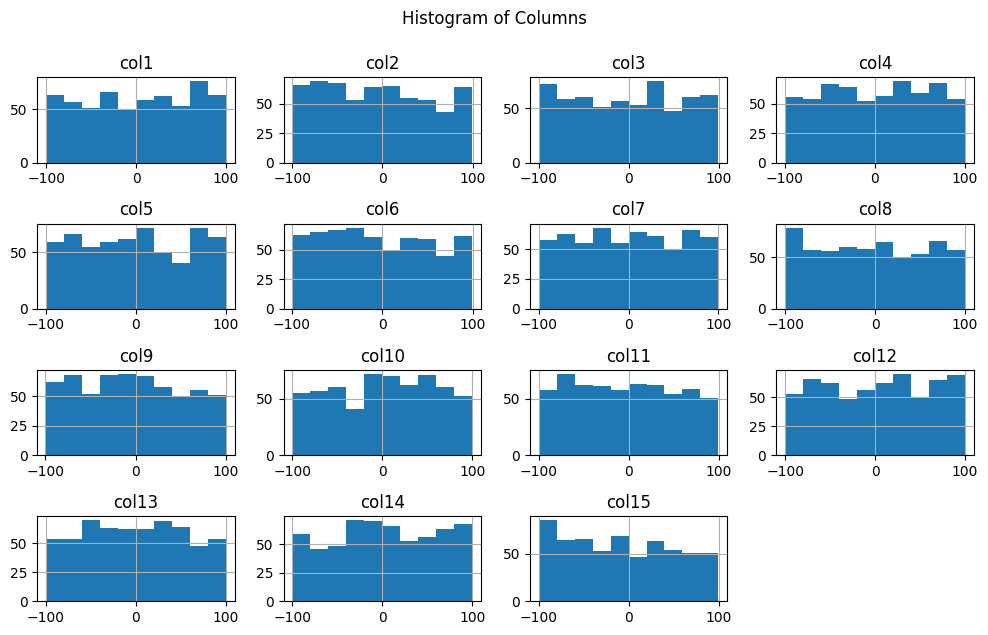

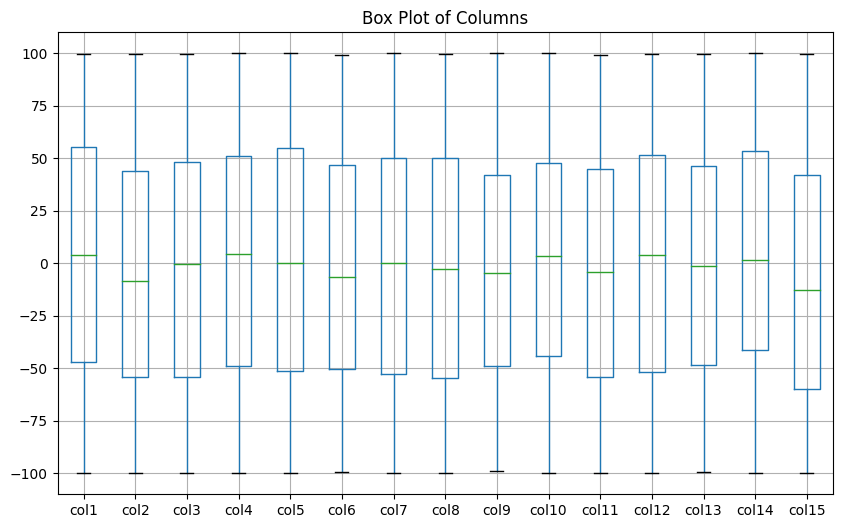

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate random dataset
dataset = pd.DataFrame(np.random.uniform(low=-100, high=100, size=(600, 15)),
                       columns=[f"col{i+1}" for i in range(15)])

# (i) Plot scatter graph between Column 5 and Column 6
plt.scatter(dataset['col5'], dataset['col6'])
plt.xlabel('Column 5')
plt.ylabel('Column 6')
plt.title('Scatter Plot: Column 5 vs Column 6')
plt.show()

# (ii) Plot histogram of each column in a single graph
dataset.hist(figsize=(10, 6))
plt.tight_layout()
plt.suptitle('Histogram of Columns', y=1.05)
plt.show()

# (iii) Plot the box plot of each column in a single graph
dataset.boxplot(figsize=(10, 6))
plt.title('Box Plot of Columns')
plt.show()


In [5]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, ranksums

# Set random seed for reproducibility
np.random.seed(42)

# Generate random dataset
dataset = pd.DataFrame(np.random.uniform(low=5, high=10, size=(500, 5)),
                       columns=[f"col{i+1}" for i in range(5)])

# (i) Perform t-Test on each column
ttest_results = {}
for col in dataset.columns:
    t_statistic, p_value = ttest_1samp(dataset[col], 7.5)  # Assuming the null hypothesis mean of 7.5
    ttest_results[col] = {"t_statistic": t_statistic, "p_value": p_value}

# (ii) Perform Wilcoxon Signed Rank Test on each column
wilcoxon_results = {}
for col in dataset.columns:
    statistic, p_value = wilcoxon(dataset[col] - 7.5)  # Assuming the null hypothesis median of 7.5
    wilcoxon_results[col] = {"statistic": statistic, "p_value": p_value}

# (iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4
col3 = dataset['col3']
col4 = dataset['col4']
ttest_ind_result = ttest_ind(col3, col4)
ranksums_result = ranksums(col3, col4)

# Print the results
print("T-Test Results:")
for col, result in ttest_results.items():
    print(f"Column {col}: t-statistic = {result['t_statistic']}, p-value = {result['p_value']}")
print("\nWilcoxon Signed Rank Test Results:")
for col, result in wilcoxon_results.items():
    print(f"Column {col}: statistic = {result['statistic']}, p-value = {result['p_value']}")
print("\nTwo Sample T-Test Results:")
print(f"Column 3 and Column 4: t-statistic = {ttest_ind_result.statistic}, p-value = {ttest_ind_result.pvalue}")
print("\nWilcoxon Rank Sum Test Results:")
print(f"Column 3 and Column 4: statistic = {ranksums_result.statistic}, p-value = {ranksums_result.pvalue}")


T-Test Results:
Column col1: t-statistic = 0.5041343300096032, p-value = 0.6143894953604193
Column col2: t-statistic = -0.7205661743310633, p-value = 0.47151388152070284
Column col3: t-statistic = 0.036618210079558886, p-value = 0.9708040676736971
Column col4: t-statistic = -0.10382760791447612, p-value = 0.9173478725070286
Column col5: t-statistic = -0.14903626947224208, p-value = 0.881585225002469

Wilcoxon Signed Rank Test Results:
Column col1: statistic = 60997.0, p-value = 0.614498971484597
Column col2: statistic = 60213.0, p-value = 0.455539576427474
Column col3: statistic = 62434.0, p-value = 0.9528799798672576
Column col4: statistic = 62199.0, p-value = 0.8951475500488911
Column col5: statistic = 62175.0, p-value = 0.8892774188946054

Two Sample T-Test Results:
Column 3 and Column 4: t-statistic = 0.09986315345227309, p-value = 0.9204730253478132

Wilcoxon Rank Sum Test Results:
Column 3 and Column 4: statistic = 0.1191248809558157, p-value = 0.905176418944118
